# Clustering

머신러닝의 학습 방법은 크게 지도 학습(supervised learning)과 비지도 학습(unsupervised learning)으로 나눌 수 있다.
- 지도 학습 : 라벨링이 된 데이터를 학습시키는 것을 의미
- 비지도 학습 : 라벨링이 되지 않은 데이터를 학습시키는 것을 의미

(여기서 라벨링이란 train data에 정답이 표시된것을 의미한다.)

비지도학습의 가장 대표적인 학습 방법으로는 군집이 있다. 군집(clustering)은 비슷한 샘플 데이터끼리 그룹으로 모으는 작업을 의미하며, 군집 알고리즘을 통해 만들어진 그룹을 클러스터(cluster)라고 부른다. 군집의 대표적인 알고리즘으로는 K-means, K-Medians, Mean-Shift, DBSCAN가 있다. 그 중 K-means, Mean-Shift, DBSCAN에 대해 자세히 알아보겠습니다

<img src='https://gaussian37.github.io/assets/img/ml/concept/k-means/unsupervised-learning.PNG' width='600' height='320'/>

# K-means

### 알고리즘

K-means 알고리즘의 원리는 다음과 같다.

1. training sample에서 우리가 cluster의 개수만큼 클러스터 중심(cluster center)/센트로이드(centroid)를 임의로 지정한다. (Random하게 K개의 센트로이드를 초기화한다.)

$$\mu_{1}, \mu_{2}, \cdots, \mu_{k} \in \mathbb{R}^{n}$$

2. 모든 training sample에 대해서 가장 가까운 센트로이드의 cluster로 할당한다. (cluster assignment step)

$$\min_{k}||x^{(i)}-\mu_{k}||^{2}$$

3. 각 cluster에 해당하는 모든 점들의 평균을 구하고, 그 평균으로 센트로이드를 옮긴다(갱신한다). (move centroid step)

$$\mu_{k}=\frac{1}{m}(x^{1}, \cdots, x^{i}, \cdots, x^{m})$$

4. 2번과 3번을 계속해서 반복하면, 센트로이드가 더 이상 움직이지 않고 수렴하는 지점에서 cluster가 결정된다.

- $\mu_{k}$ : cluster k의 centriod 위치
- $k$ : cluster의 개수
- $\{x^{i}\}$ : 각 cluster에 있는 training set
- $m$ : 각 cluster에 있는 training set의 개수

<p float="left">
    <img src="https://gaussian37.github.io/assets/img/ml/concept/k-means/2.PNG" width="200" height='180'/>
    <img src="https://gaussian37.github.io/assets/img/ml/concept/k-means/3.PNG" width="200" height='180'/>
    <img src="https://gaussian37.github.io/assets/img/ml/concept/k-means/6.PNG" width="200" height='180'/>
</p>

### 최적화

K-means 알고리즘을 최적화하는 방법은 다음과 같다. 아래는 K-means 알고리즘의 비용함수다.(Distortion function이라고 부르기도 한다.)

$$J(c^{(1)}, \cdots, c^{(m)}, \mu^{(1)}, \cdots, \mu^{(k)})=\frac{1}{m}\sum^{m}_{i=1}||x^{(i)}-\mu_{c^{(i)}}||^{2}$$

$$ \min_{c, \, \mu} J(c^{(1)}, \cdots, c^{(m)}, \mu^{(1)}, \cdots, \mu^{(k)})$$

- $c^{(i)}$ : 각각의 training set($x^{i}$)이 할당되어 있는 cluster의 인덱스
- $\mu_{k}$ : cluster k의 centriod 위치
- $\mu_{c^{(i)}}$ : cluster의 인덱스($c^{(i)}$)의 centriod 위치

우리의 최종 목적은 비용함수 J를 최소화하는 c와 $\mu$를 찾는 것이다.

+ 추가적으로 random initialization을 통해 여러번 시행시켜 local optima에 도달하지 않고 가장 좋은 모델을 선택하는 것이 바람직하다.

### + K의 값 정하기

cluster의 개수인 k를 결정하는 것은 일반적으로 데이터를 직접 확인하거나 다른 clustering algorithm의 결과를 보고 선택할 수 있다. 그 중에서 Elbow Method가 있다. 이 방법은 k의 개수를 1에서 점차 늘려가면서 비용함수(Distortion function)을 계산한다. x축을 k(cluster의 개수), y축을 비용함수로 설정하고 그래프를 그려보면, 특정 k 이후의 비용이 거의 변하지 않는 지점이 있다. 우리는 그곳을 elbow point라고 일컫고, 보통 해당 k를 선택하게 된다.

<img src='https://gaussian37.github.io/assets/img/ml/concept/k-means/15.PNG
' width='600' height='320'/>


### 예제

KMeans 알고리즘를 scikit-learn에 있는 붓꽃 종류 데이터를 활용해 서술했다. 우선 dataset에서 DataFrame을 활용해 구조를 파악하고, feature, target variable을 설정한다.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
x_data = iris.data[:, :2] #use only 'sepal length and sepal width' # 'sepal length (cm)''sepal width (cm)'
y_data = iris.target

In [2]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(x_data)

KMeans(n_clusters=3, random_state=42)

In [5]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [6]:
import numpy as np
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([47, 53, 50]))

`.transform` 메소드는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해준다.

In [7]:
km.transform(x_data)

array([[1.76483558, 1.05159358, 0.11840608],
       [1.91421501, 0.9261403 , 0.44093083],
       [2.11649197, 1.18751365, 0.38160189],
       [2.21291325, 1.24233499, 0.52193869],
       [1.88740674, 1.19250806, 0.17210462],
       [1.6362795 , 1.26401576, 0.61483331],
       [2.23658316, 1.37037386, 0.40696437],
       [1.84176313, 1.04835901, 0.02863564],
       [2.41906566, 1.38917649, 0.80375369],
       [1.91293635, 0.96397369, 0.34470277],
       [1.54505593, 1.07457758, 0.47876926],
       [2.03892075, 1.20353254, 0.2078942 ],
       [2.01414307, 1.02100579, 0.47499474],
       [2.51386918, 1.50533642, 0.82560281],
       [1.37197092, 1.30781396, 0.9785806 ],
       [1.73068857, 1.70913197, 1.19432826],
       [1.6362795 , 1.26401576, 0.61483331],
       [1.76483558, 1.05159358, 0.11840608],
       [1.32839928, 1.10998895, 0.78741349],
       [1.86009779, 1.2962937 , 0.38369259],
       [1.44978574, 0.80011792, 0.39499367],
       [1.82341915, 1.21196862, 0.28778464],
       [2.

`.predict` 메소드는 가장 가까운 centriod의 cluster로 출력한다.

In [8]:
y_predict = km.predict(x_data)
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

KMeans는 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾는데, `n_iter_` 메소드는 이 알고리즘이 반복한 횟수를 출력한다.

In [9]:
print(km.n_iter_)

8


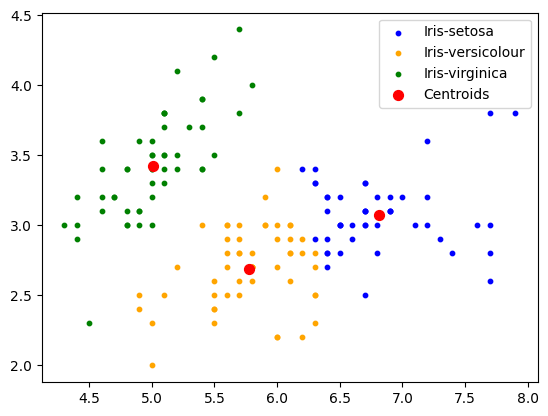

In [10]:
import matplotlib.pyplot as plt

#Visualising the clusters
plt.scatter(x_data[y_predict == 0, 0], x_data[y_predict == 0, 1], s = 10, c = 'blue', label = 'Iris-setosa')
plt.scatter(x_data[y_predict == 1, 0], x_data[y_predict == 1, 1], s = 10, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x_data[y_predict == 2, 0], x_data[y_predict == 2, 1], s = 10, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.legend()

최적의 k를 찾는 Elbow method를 진행해보겠다. centriod와 샘플 사이의 거리의 제곱 합을 inertia라고 부르는데, inertia는 클러스터에 속한 샘플이 얼마나 가깝게 모여있는지를 나타낸다고 생각하면 된다. 일반적으로 클러스터 개수가 늘어나면 inertia도 줄어든다. KMeans에는 `inertia_` 메소드를 통해 Elbow method를 실행할 수 있다.

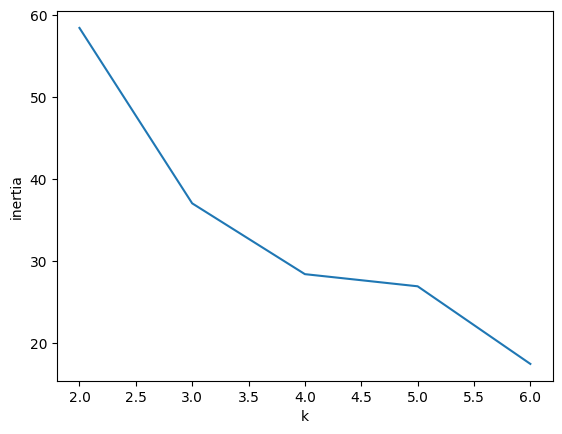

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_data)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# Mean-Shift Clustering
<br/>
<br/>


## 1. Mean-Shift Clustering 본격 시작 전 공부 흐름 이해하기
여태까지, clustering이 무엇인지 이해하고 clustering의 가장 대표적이고 간단한 예시인 K-means에 대해 알아보았다. K-means는 전체 N개의 데이터를 K개의 cluster로 빠르게 묶어낸다는 장점을 가지고 있지만, 두 가지의 한계점을 가지고 있다.
- cluster의 개수 K가 사전에 결정되어야 한다.
- 초기 중심점(Centroid) 설정에 따라 수렴 여부가 크게 좌우된다.

반면 시간이 좀 더 걸리더라도, 데이터에 따라 적절한 클러스터 개수 K를 발견하는 것부터 컴퓨터가 스스로 찾아내고 그 후 clustering을 해야하는 경우에는 비모수 기법(nonparametric method)을 사용해야 한다. 이때 평균점 이동(Mean-shift) clustering이 이러한 비모수 클러스터링 기법의 대표적인 알고리즘이다.  

위의 짧은 이야기만으로도 K-means에서 Mean-Shift로 어떠한식으로 공부 사고의 흐름이 확장되는지, 지금 무엇에 대해 자세히 살펴보려하는 것인지 훨씬 와닿았을거라 믿는다. 그럼 이제 Mean-Shift Clustering에 대해 구체적으로 알아보자!  
<br/>
<br/>
<br/>
<br/>

## 2. 러프하게 직관적으로 느껴보는 Mean-Shift Clustering

'1. Mean-Shift Clustering 본격 시작 전 공부 흐름 이해하기'에서 Mean-Shift Clustering은 클러스터의 개수 k부터 스스로 찾는다고 하였다. 각 데이터마다 밀도가 높은 가까운 부분으로 이동하다보면 자연스레 데이터들이 모이는 지점들이 생길 것이고 적절한 k가 무엇일지 보이기 시작할 것이며 그를 토대로 클러스터를 형성할 수 있을 것이다. 그림과 함께 봐보도록 하자.  
<br/>

데이터 x들이 아래와 같은 그래프를 형성하고 있다. 빨간 점들이 우리가 보려는 데이터들이라고 하자.  
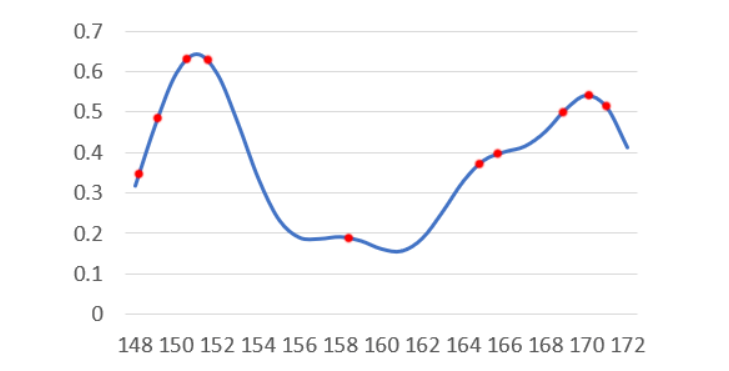
<br/>
<br/>
빨간 점 데이터들 각각에 대하여 주변의 밀도를 계산해서 밀도가 높은 쪽으로 조금씩 이동시킨다고 하면, 아래 그래프에 표현된 모습을 상상해볼 수 있을 것이다.  
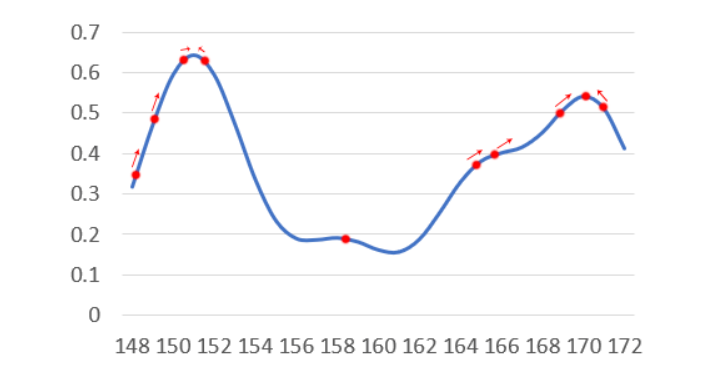
<br/>
위 그래프에 표시된 방향대로 점들이 움직이다보면 왼쪽, 중간지점, 오른쪽 총 3개의 클러스터가 형성될 것이라는게 눈에 보일 것이다! 이것이 바로 Mean-Shift clustering의 알고리즘의 아이디어이다. (실제로는 위 그래프에서 본 것처럼 연속적인 분포가 주어지지는 않고 점들만 주어지므로 이에 대한 계산 과정 필요)
<br/>
<br/>
<br/>
<br/>

## 3. 알고리즘
<br/>
이제 명확한 용어를 사용하며 구체적으로 알아보자. 참고로, 머신 러닝을 처음 공부하는 단계라면 Mean shift clustering을 위해 KDE가 사용된다고 하는데 KDE가 뭔지 아래 설명만으로는 이해가 한 번에 잘 되지 않을수도 있다. 아래 'KDE(Kernel Density Estimation, 커널 밀도 추정)이란?' 부분에 KDE를 알기 위해 알아야하는 필수 개념들이 어떤 것들이 있는지 간단히 써두었으니, 아래 키워드를 기반으로 충분한 검색을 해보길 바란다. (KDE 뿐만 아니라 본인이 이 자료를 공부하다가 모르겠는 모든 부분에 대해 꼭 짚고 넘어가길 바란다.)

- Mean shift clustering란?
    - KDE 기반으로 밀도가 가장 높은 지점으로 군집 중심점을 이동시켜 군집화를 수행하는 알고리즘
    - K-Means와의 비교: K-Means는 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 반면 Mean Shift는 중심을 데이터의 밀도가 가장 높은 곳으로 이동시킴
<br/>
<br/>
- KDE(Kernel Density Estimation, 커널 밀도 추정)이란?
    - 밀도: 지점 x=a에서의 함수값 f(a)
    - 밀도  추정: 관측된 데이터(표본)의 분포를 통해 원래 변수(모집단)의 확률 밀도(분포)를 추정하는 것
    - 커널 함수: 원점을 중심으로 대칭이면서 적분값이 1인 non-negative 함수 (ex: Gaussian, Uniform)
    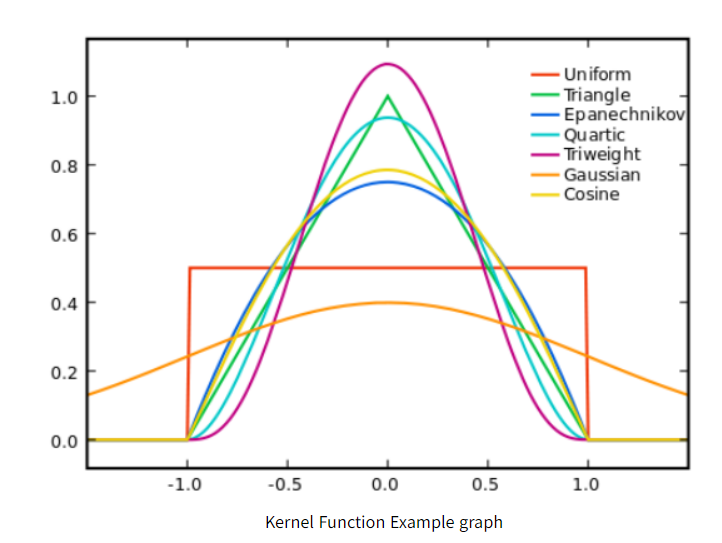
    - Parametric/Non-Parametric: 모델에 대하여 명확하게 정해진 가정이 존재/데이터 모델이 명확하지 않
    - 커널 밀도 추정: Non-Parametric Density Estimation중의 한 방식으로 Kernel function을 이용하여 Histogram의 문제점을 개선(Histogram을 smoothing했다고 볼 수 있겠다.)한 밀도 추정 방식  
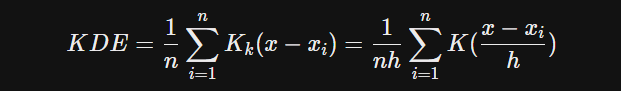




- 수행 식
    - KDE (Kernel Density Estimation)로 확률 밀도 함수 (Probability Density Function)을 찾음
    - KDE를 이용하여 데이터 포인트들이 데이터 분포가 높은 곳으로 이동하면서 군집화를 수행
    - 별도의 군집화 개수를 지정하지 않고, 데이터 분포도에 기반하여 자동으로 군집 개수 선정
<br/>
<br/>
- 알고리즘의 장단점
    - 장점: K-Means 알고리즘과 대조되게, 군집의 개수를 지정해 줄 필요가 없고 평균이동 알고리즘이 알아서 군집의 개수를 알아낸다(아주 큰 장점).
    - 단점: 창의 크기, 즉 반지름의 결정이 중요하게 다뤄지지 않는다는 점이다.
<br/>
<br/>
<br/>
<br/>

## 예제

※ 변수에 데이터가 어떻게 저장되어있는지 등 print해보고 싶은 부분이 생긴다면 아래 코드에 print문을 추가하여 꼭 확인해도록하자.

필요한 라이브러리들을 import하자. 사이킷런은 Mean-Shift Clustering을 위해 MeanShift 클래스를 제공한다.

In [12]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

make_blobs 함수를 사용하여 가상 데이터셋을 생성해보자. X에는 feature을, y에는 각 data point의 군집 label을 할당한다. 또한 MeanShift 클러스터링 알고리즘을 사용하여 데이터를 클러스터링한다.

In [13]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                  cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)

bandwidth 값을 다르게 설정하여 클러스터링을 수행해보자.

In [14]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels))  # 유형 출력해보기

[0 1 2]


estimate_bandwidth 함수를 통해 최적의 bandwidth 값을 추정해보자.

In [15]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print(round(bandwidth, 3))  # bandwidth 값

1.816


최적의 bandwidth를 사용하여 다시 클러스터링을 수행해보자.

In [16]:
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels)) # 유형 출력해보기

[0 1 2]


클러스터링 결과를 시각화해보자.

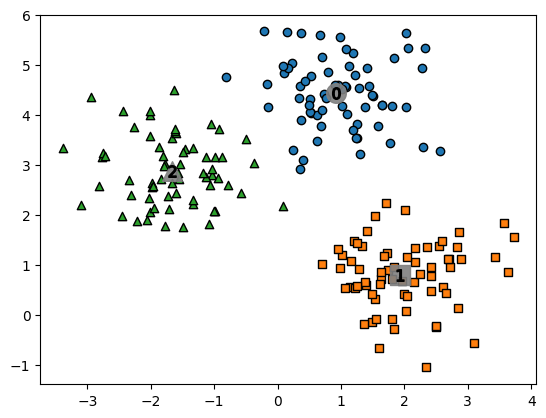

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

In [18]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


# DBSCAN
<br/>
<br/>


## 1. DBSCAN에 대해 이해하여 보자!
DBSCAN(Density-based spatial clustering of application with noise)이라는 약자로 밀도기반 클러스터링 방법 입니다.
<br/>
<br/>
비계층적 군집화 방법에는 크게 distance-based 방법과 density-based 방법이 있는데, 이번에 가장 처음 접했던 k-means clustering은 distance-based 방법이고 DBSCAN은 density-based 방법에 속한다고 볼 수 있습니다.
<br/>
<br/>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fl7O7x%2FbtrC2gKN4yD%2Fr7CT0eMk0KeJtNZkkI8KNk%2Fimg.jpg
' width='600' height='320'/>

[Parameters]
<br/>
Eps : 데이터 포인트에서의 반경
<br/>
MinPts : 군집 생성에 필요한 최소 데이터 포인트 수(자기 자신도 포함!)
<br/>
예시) minPts = 4라고 하면 아래 그림은 점이 5개가 있기 때문에 하나의 군집으로 판단
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F9930A63359E057BA1A
' width='400' height='220'/>


##Algorithm
DBSCAN은 어떠한 임의의 점을 시작으로 density reachable될 수 있는 점을 점차 확대해나가며 cluster를 형성합니다. 그러다가 더이상 density reachable될 수 있는 점이 없으면 clustering을 멈추고, 새로운 점으로 이동해 새로운 cluster를 만들고 위의 작업을 반복하고 어디에도 포함되지 않는 데이터 포인트들은 noise로 취급합니다.
<br/>
<br/>
- core point : 설정한 이웃점(min_sample) 수가 설정한 반지름(epc) 내에 떨어진다면, 그 점은__(자기 자신 포인트 포함)__ core point 이다.
- border point : 아래 그림처럼 Eps 내에서, 설정한 이웃 점의 갯수보다 더 작은 수의 이웃을 갖는 점이지만, core poring 로 부터, Eps 안에 놓이는 점이다.(군집에 속하는 점)
- noise point : core도 border도 아닌 다른 모든 점들은 잡음점이다.
<br/>
[border point(P2)]
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F996B8A3359E057BA27
' width='350' height='220'/>
<br/>
[noise point(P4)]
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99D7893359E057B938
' width='350' height='220'/>

<br/>
<br/>
step 별로 살펴보면,

- 임의로 point p를 하나 선정한다.
- p로부터 density reachable한 모든 point q를 찾는다.
- p가 core point인 경우, cluster를 형성한다.
- p가 border point인 경우, density reachable한 점이 없기 때문에 다른 point로 새 시작한다.
- 위 step을 반복한다.
<img src='https://blog.kakaocdn.net/dn/dbsrtM/btrCXSyvXm4/VbQ9LBnSzMeEifhGAnfdLK/img.gif
' width='600' height='320'/>


간단하게 데이터 프레임을 만들어보자

In [19]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.5,min_samples=5)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[150 rows x 5 columns]


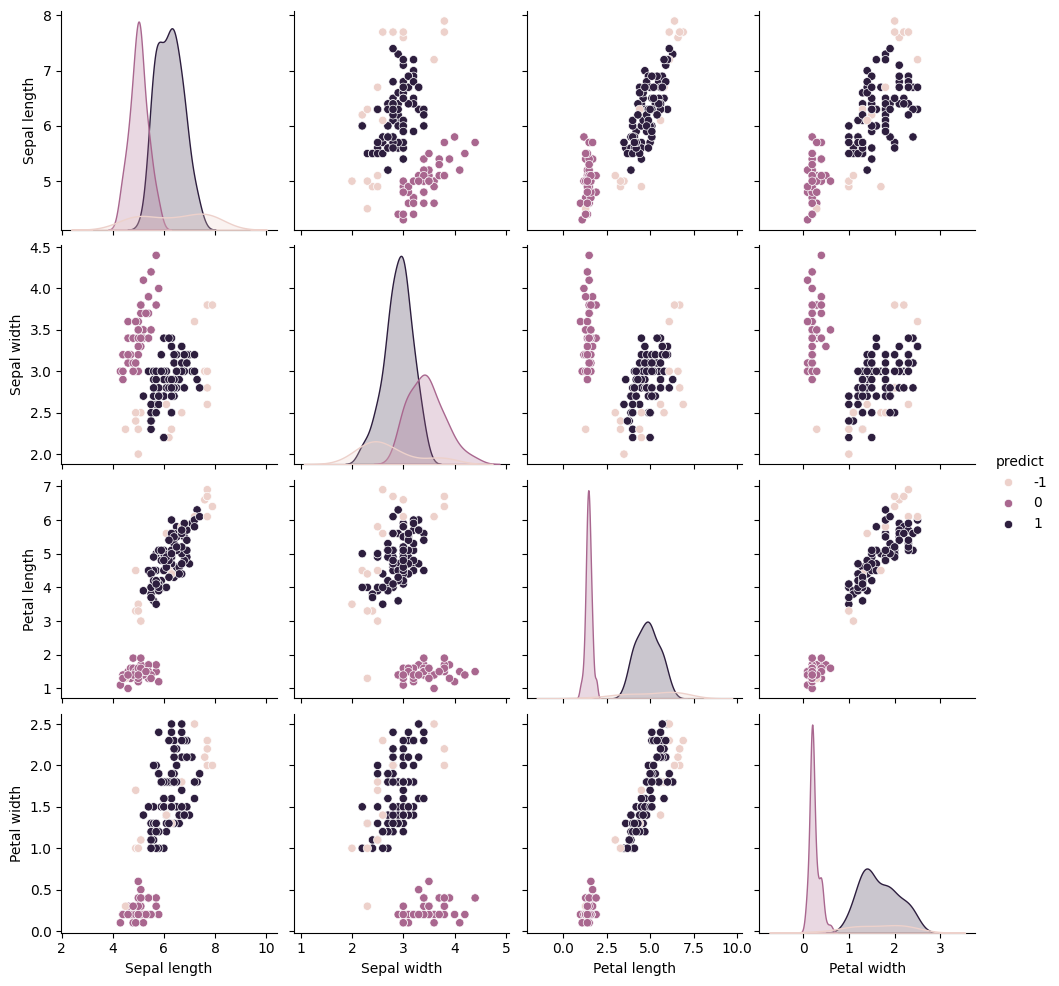

In [23]:
#sns 라이브러리의 pairplot으로 표현
sns.pairplot(r,hue='predict')
plt.show()

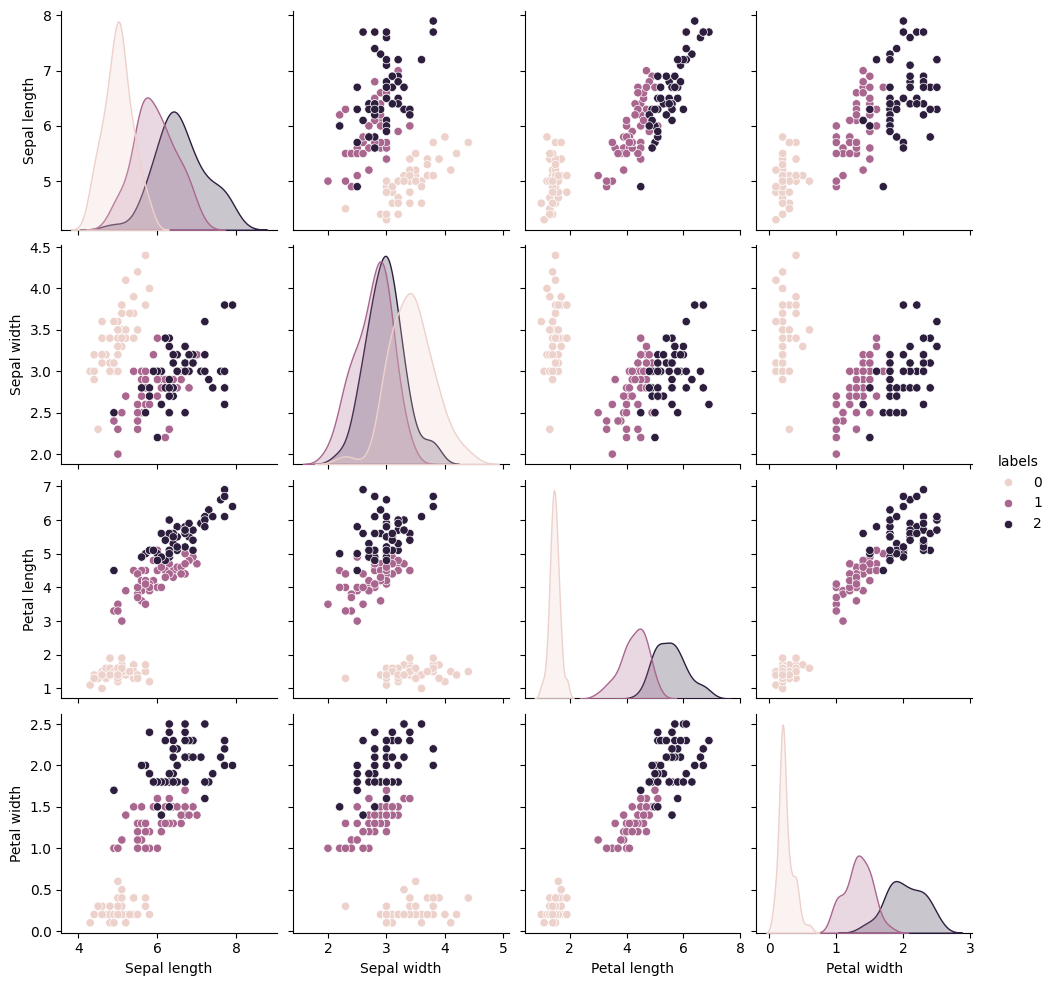

In [24]:
#sns 라이브러리의 pairplot으로 표현
sns.pairplot(data,hue='labels')
plt.show()